In [29]:
%matplotlib inline
from pylab import *
from IPython import display
import time
from numpy.random import uniform
from scipy.integrate import odeint

In [30]:
def Accelx(Fx):
    a = 0#(Fx[0]+Fx[1])/m #-(k*xn)/m    #### Fill this in
    
    return a

def RKStepx(x, Vx, F,dt): ### Implement a single step of the Runge-Kutta method...
    dVx1=dt*Accelx(x)
    dx1=dt*Vx
    dVx2=dt*Accelx(F)
    dx2=dt*(Vx+(dVx1/2))
    dVx3=dt*Accelx(F)
    dx3=dt*(Vx+(dVx2/2))
    dVx4=dt*Accelx(F)
    dx4=dt*(Vx+dVx3)
    Vxnew = Vx +(1.0/6)*(dVx1+dVx4+2*(dVx2+dVx3))
    xnew = x +(1.0/6)*(dx1+dx4+2*(dx2+dx3))
    P=[xnew,Vxnew]
    
    return P



In [31]:
def Accely(Fy):
    a = (-9.8 +Fy[0]+Fy[1])/m#-(k*xn)/m    #### Fill this in
    
    return a

def RKStepy(y, Vy, F,dt): ### Implement a single step of the Runge-Kutta method...
    dVy1=dt*Accely(F)
    dy1=dt*Vy
    dVy2=dt*Accely(F)
    dy2=dt*(Vy+(dVy1/2))
    dVy3=dt*Accely(F)
    dy3=dt*(Vy+(dVy2/2))
    dVy4=dt*Accely(F)
    dy4=dt*(Vy+dVy3)
    Vynew = Vy +(1.0/6)*(dVy1+dVy4+2*(dVy2+dVy3))
    ynew = y +(1.0/6)*(dy1+dy4+2*(dy2+dy3))
    P=[ynew,Vynew]
    
    return P

In [32]:
def RKSol(iv , t):
    dt=t[1]-t[0]
    Nsteps = len(t)
    
    y = zeros(Nsteps)
    Vy = zeros(Nsteps)
    y[0] = iv[1,0]
    Vy[0] = iv[1,1]

    x = zeros(Nsteps)
    Vx = zeros(Nsteps)
    x[0] = iv[0,0]
    Vx[0] = iv[0,1]
    F= iv[2,:]
    
    
    for nt in range(0, len(t)-1):
        y[nt+1],Vy[nt+1]=RKStepy(y[nt],Vy[nt], F,dt)
        x[nt+1],Vx[nt+1]=RKStepx(x[nt],Vx[nt], F,dt)
    
    return x, y

In [35]:
F1=-4.9
F2=-4.9
ix=0#6.0
iVx=0 #5.0
iy=0.0
iVy=0#10.0
m= 3.3
iv=zeros((3,2))
iv[0,0]= ix
iv[0,1]= iVx

iv[1,0]= iy
iv[1,1]= iVy

iv[2,0]= F1
iv[2,1]= F2

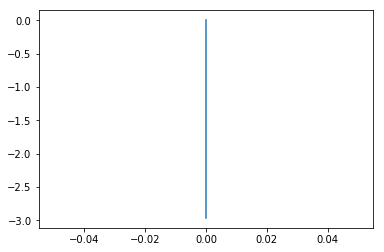

In [36]:
tmax=1
L=10.0
dt=.001
t= arange(0.0, tmax, dt)
x,y = RKSol(iv,t)


plot(x,y)
#plot(t,x)